In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [364]:

df = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv', usecols=['date', 'calls'])

# Sicherstellen, dass die 'Date'-Spalte als Index gesetzt und als Datetime interpretiert wird
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 'calls'-Spalte in float umwandeln
df['calls'] = df['calls'].astype(float)


# Überprüfen des DataFrame
print(df.head())
print(df.dtypes)
print(df.isnull().sum())


             calls
date              
2016-04-01  8154.0
2016-04-02  8526.0
2016-04-03  8088.0
2016-04-04  7044.0
2016-04-05  7236.0
calls    float64
dtype: object
calls    0
dtype: int64


In [366]:

df.head()

,calls
date,
2016-04-01,8154.0
2016-04-02,8526.0
2016-04-03,8088.0
2016-04-04,7044.0
2016-04-05,7236.0


<Axes: xlabel='date'>

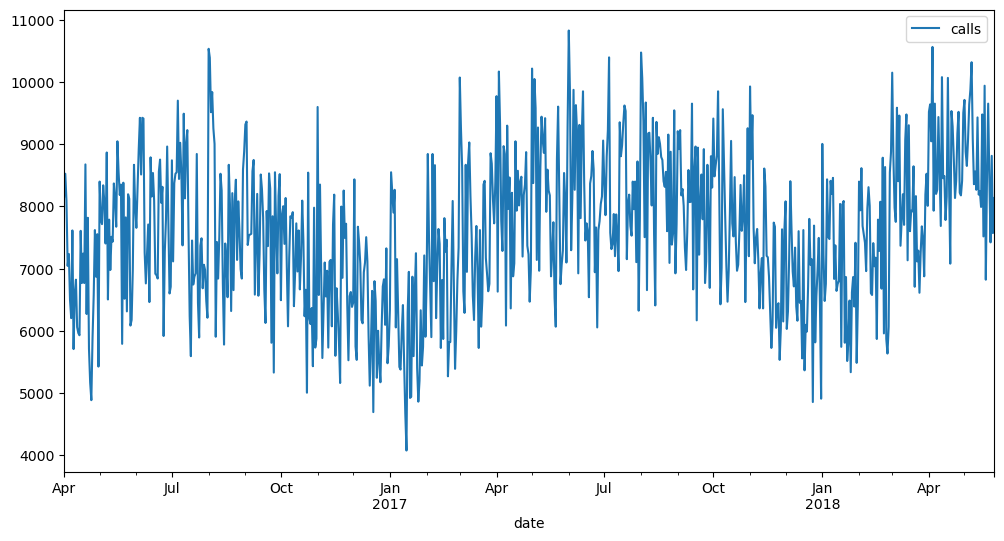

In [368]:
df.plot(figsize=(12,6))

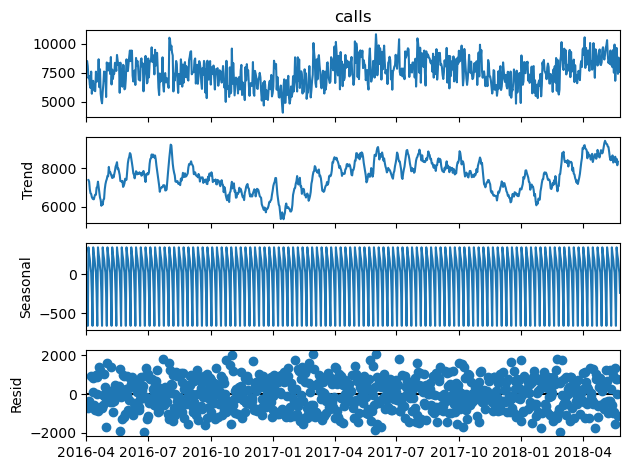

In [370]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['calls'])
results.plot();

In [371]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [374]:

df.head(),df.tail()

(             calls
 date              
 2016-04-01  8154.0
 2016-04-02  8526.0
 2016-04-03  8088.0
 2016-04-04  7044.0
 2016-04-05  7236.0,
              calls
 date              
 2018-05-22  8442.0
 2018-05-23  7422.0
 2018-05-24  8814.0
 2018-05-25  7572.0
 2018-05-26  8136.0)

In [376]:
train = df
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv',
    usecols=['date', 'calls'],       # Spalten 'Date' und 'calls' laden
    index_col='date',                # 'Date' als Index setzen
    parse_dates=True                  # 'Date' als Datetime-Index parsen
                   )
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

scaled_train[:10]

array([[0.60390764],
       [0.6589698 ],
       [0.59413854],
       [0.43960924],
       [0.46802842],
       [0.35790409],
       [0.31527531],
       [0.52397869],
       [0.24156306],
       [0.37477798]])

In [378]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [380]:
# define generator
n_input = 365
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [382]:

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.60390764 0.6589698  0.59413854 0.43960924 0.46802842 0.35790409
 0.31527531 0.52397869 0.24156306 0.37477798 0.40674956 0.29396092
 0.27975133 0.27442274 0.52309059 0.39875666 0.46891652 0.39875666
 0.68117229 0.3250444  0.55417407 0.24245115 0.1616341  0.11989343
 0.26731794 0.37033748 0.52486679 0.41385435 0.51509769 0.19982238
 0.64031972 0.54884547 0.53907638 0.63143872 0.59058615 0.4928952
 0.70959147 0.35968028 0.54973357 0.42984014 0.50888099 0.4973357
 0.63587922 0.60124334 0.53285968 0.73623446 0.6625222  0.60834813
 0.63321492 0.25399645 0.63765542 0.36145648 0.55506217 0.3312611
 0.61012433 0.59946714 0.29751332 0.31083481 0.43072824 0.68028419
 0.58170515 0.53019538 0.62522202 0.71758437 0.79218472 0.65719361
 0.79218472 0.79040853 0.47158082 0.39786856 0.46714032 0.53818828
 0.35346359 0.69804618 0.60479574 0.660746   0.59502664 0.42095915
 0.41740675 0.40941385 0.6642984  0.69271758 0.58969805 0.62788632
 0.27264654 0.47335702 0.55062167 0.72380107 0.

In [384]:

X.shape

(1, 365, 1)

In [386]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(46))
model.compile(optimizer='adam', loss='mse')

In [388]:
model.summary()
     

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 46)                4646      
                                                                 
Total params: 45446 (177.52 KB)
Trainable params: 45446 (177.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [390]:
# fit model
model.fit(generator,epochs=20)

Epoch 1/20
421/421 [==============================] - 24s 55ms/step - loss: 705685760.0000
Epoch 2/20
421/421 [==============================] - 27s 65ms/step - loss: nan
Epoch 3/20
421/421 [==============================] - 24s 57ms/step - loss: nan
Epoch 4/20
421/421 [==============================] - 24s 56ms/step - loss: nan
Epoch 5/20
421/421 [==============================] - 29s 68ms/step - loss: nan
Epoch 6/20
421/421 [==============================] - 29s 69ms/step - loss: nan
Epoch 7/20
421/421 [==============================] - 24s 56ms/step - loss: nan
Epoch 8/20
421/421 [==============================] - 25s 59ms/step - loss: nan
Epoch 9/20
421/421 [==============================] - 25s 60ms/step - loss: nan
Epoch 10/20
421/421 [==============================] - 31s 74ms/step - loss: nan
Epoch 11/20
421/421 [==============================] - 28s 66ms/step - loss: nan
Epoch 12/20
421/421 [==============================] - 25s 59ms/step - loss: nan
Epoch 13/20
421/421 [=====

[705685760.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


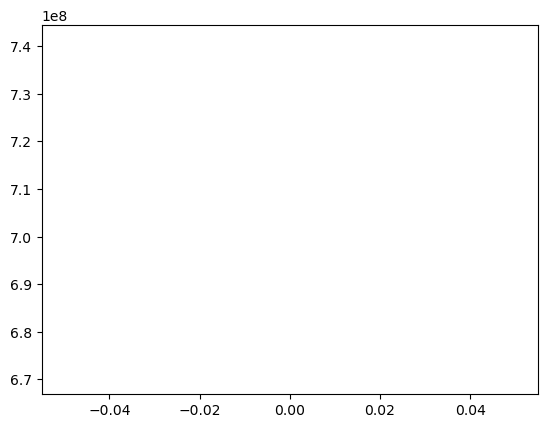

In [391]:

loss_per_epoch = model.history.history['loss'] 
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
print(loss_per_epoch)

In [396]:
last_train_batch = scaled_train[-365:]

In [398]:


last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [403]:

model.predict(last_train_batch)



1/1 [==============================] - 0s 56ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [405]:
scaled_test[0]

array([0.4964476])

In [407]:

test_predictions = []
offset = 15
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred+offset) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 30ms/step


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 46

In [409]:
test_predictions = []
offset = 15
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # get the prediction value for the current batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred+offset) 
    
    # use the actual next value to update the batch and remove the first value
    actual_value = scaled_test[i-1]  # assuming scaled_test is the scaled version of the test dataset
    
    current_batch = np.append(current_batch[:, 1:, :], [[actual_value]], axis=1)


1/1 [==============================] - 0s 26ms/step


In [413]:


test_predictions

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,

In [417]:

test.head()

,calls,Predictions
date,,
2018-05-27,7428,109485.533512
2018-05-28,8862,109598.106022
2018-05-29,8226,109421.902210
2018-05-30,8064,109592.487705
2018-05-31,7392,109542.051716


In [419]:

true_predictions = scaler.inverse_transform(test_predictions)

In [423]:

test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [425]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['calls'],test['Predictions']))
print(rmse)

ValueError: Input contains NaN.